# Hands-on Machine Learning with Scikit-Learn & TensorFlow

기본설정

In [3]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf ##배워보자 !!!



np.random.seed(42)



matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# Part2 신경망과 딥러닝

# 9장텐서플로 시작하기

## 9.0 Introduction

- 수치 계산을 위한 강력한 오픈소스 소프트웨어 라이브러리
- 계산 그래프를 먼저 정의 후 이 그래프를 실행시킴
- 계산 그래프를 여러 부분으로 나누어 여러 CPU, GPU에서 병렬로 실행할 수 있음

333- 이 장에서는 설치에서부터 간단한 계산 그래프의 생성, 실행, 저장, 시각화까지 다룸

## 9.1 설치

pip install --upgrade tensorflow  
등을 이용해서 잘 설치하세연

## 9.2 첫 번째 계산 그래프 만들기

- 일단 계산 그래프를 만들어 보자!

In [4]:
x = tf.Variable(3, name='x')
y = tf.Variable(4, name='y')
f = x*x*y + y + 2

###x를 변수로 선언
###y를 변수로 선언
###f를 연산으로 선언

- 여기서 중요한 점은 실제로는 어떤 계산도 수행하지 않았다는 것이다
- 이것은 계산 그래프만 만든다 (변수초기화도 X)
- 다른 말로는 '노드'만 생성했다고 표현함

계산 그래프나 노드를 실행하여 연산의 값을 계산한다는 의미로 종종 평가라는 용어를 사용하기도 함

밑에서는 세션을 실행하는 방법들과 변수를 초기화하는 방법에 대해서 알아본다

In [5]:
sess = tf.Session() ##실행시키는 함수
##세션은 연산을 CPU나 GPU 같은 장치에 올리고 실행하는 것을 도와주며 모든 변숫값(?)을 가지고 있다.

sess.run(x.initializer) ##x변수를 초기화를 실행
sess.run(y.initializer) ##y변수를 초기화를 실행
result1= sess.run(f) ##f를 실행
print(result1)

sess.close()##닫아야함!!

##세션실행 방법1, 초기화 방법 1

42


이런 식으로 세션을 시작하고 변수를 초기화한 다음 f를 평가(계산,실행)해야한다  

세션을 시작 - 텐서플로우 같은 연산 패키지의 특성인 것 같다  
변수를 초기화 - C나 C+같은 프로그램의 특성인 것 같다

In [6]:
##with문은 부른 sess함수를 굳이 닫을 필요 없게 만들어줌


with tf.Session() as sess:
    x.initializer.run() ##tf.get_default_session().run(x.initializer) 과 같음
    y.initializer.run()
    result2 = f.eval()
    print(tf.get_default_session() == sess)
    
result2

##세션실행 방법 2, 초기화 방법 2

##with문을 찾아봤을 때, 부른 함수를 기본으로 까는 능력(?)이 없는 것 같음
##하지만 with문 안에 session은 기본 세션으로 깔려있음

True


42

코드를 때리다 보면, 변수 초기화는 굉장히 짜증나는 부분인데, 한번에 변수를 초기화하는 함수가 있음  
한번에 하는 것은 항상 경계해야함

In [7]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    result3 = f.eval()

result3

##세션 실행방법 2, 초기화 방법 3

42

In [8]:
sess = tf.InteractiveSession()
##session과 다른 점은 자동으로 자신을 기본 세션으로 지정한다는 것
#####이 말로 미뤄보아, session은 자신을 기본 세션으로 지정하지 않지만
#####with문 내부에서는 자기 자신을 기본 세션으로 지정(?!)

init.run() ##변수 초기화
result4 = f.eval()
result4

sess.close() ##닫아야함!!

##세션 실행방법 3, 초기화 방법 3

## 9.3 계산 그래프 관리

노드를 만들면 자동으로 기본 계산 그래프에 추가된다.

In [9]:
x1 = tf.Variable(1)
x1.graph is tf.get_default_graph()

True

가끔은 독립적인 계산 그래프를 여러 개 만들어야 할 때가 있는데,  
이렇게 하려면 다음과 같이 새로운 Graph 객체를 만들오 with 블록 안에서 임시로 이를 기본 계산 그래프로 사용할 수 있다.

In [10]:
graph = tf.Graph()
with graph.as_default():
    x2 = tf.Variable(2)

x2.graph is graph

True

In [11]:
x2.graph is tf.get_default_graph()

False

            주의!! 주피터(또는 파이썬 셀)에서 실험적인 작업을 하는 동안에는 같은 명령을 여러 번 실행하는 경우가 많음
            이렇게 하면 기본 그래프에 중독된 노드가 많이 포함됨
            가끔씩 tf.reset_default_graph()로 기본 그래프를 초기화 해주어야함

## 9.4 노드 값의 생애주기

한 노드를 평가할 때 텐서플로는 이 노드가 의존하고 있는 다른 노드들을 자동으로 찾아 먼저 평가함

In [12]:
w = tf.constant(3)
x = w + 2
y = x + 5
z = x * 3

with tf.Session() as sess:
    print(y.eval())
    print(z.eval()) ##이 코드에는 시간 낭비가 있음

10
15


세션을 시작하고 y를 평가하기 위해 계산 그래프를 실행한다    
이 때 텐서플로우는 자동으로 y가 x에 의존한다는 것과 x가 w에 의존한다는 것을 감지한다   
그래서 먼저 w를 평가하고 그다음에 x를, 그다음에 y를 평가해서 y값을 반환

z를 실행하기 위해 같은 스텝을 밟는데 이는 w, x를 두 번 평가하게 된다

밑에는 이런 비효율을 줄이는 코드

In [13]:
with tf.Session() as sess:
    y_val, z_val = sess.run([y, z]) ##한 번의 그래프 실행에서 y와 z를 모두 평가하게 만듦
    print(y_val)
    print(z_val)
    

10
15


## 9.5 텐서플로를 이용한 선형 회귀

텐서플로우 연산은 여러 개의 입력을 받아 출력을 만들 수 있다  

덧셈과 곱셈 연산은 두 개의 입력을 받아 하나의 출력을 만든다  
상수와 변수 연산은 입력이 없다(Source ops라고 한다)  

입력과 출력은 텐서라는 다차원 배열이다  
넘파이 배열과 비슷하게 텐서는 데이터 타입과 크기를 갖는다
(파이썬 API에서 텐서는 넘파이 ndarray로 나타난다)  
정수, 실수, 문자열 등의 자료형을 저장할 수 있다

선형 회귀를 해보자!!

정규 방정식을 이용할 것임
        $$\hat \theta = (X^T \cdot X)^{-1} \cdot X^T \cdot y $$

In [14]:
from sklearn.datasets import fetch_california_housing ##데이터 소환

housing = fetch_california_housing() ##데이터 소환
m, n = housing.data.shape ##개수를 얻음
housing_data_plus_bias = np.c_[np.ones((m,1)), housing.data] ##관측값 마지막에 0특성을 추가함

X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X") ##데이터를 상수로 저장
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y") ##타겟을 상수로 저장
XT = tf.transpose(X) ##X의 transpose를 저장
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y) ##matrix계산을 함

with tf.Session() as sess:
    theta_value = theta.eval() ##값구하기
    
theta_value

array([[-3.7185181e+01],
       [ 4.3633747e-01],
       [ 9.3952334e-03],
       [-1.0711310e-01],
       [ 6.4479220e-01],
       [-4.0338000e-06],
       [-3.7813708e-03],
       [-4.2348403e-01],
       [-4.3721911e-01]], dtype=float32)

In [15]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

## 9.6 경사 하강법 구현

텐서플로우를 이용한 계산을 더 해보자!!   

서브 섹션은 수동으로 직접 미분 함수를 계산해보기, 텐서플로의 자동 미분 기능을 사용해 미분하기, 텐서플로우에 내장된 옵티마이저를 사용하기로 구성한다

### 9.6.1 직접 그래디언트 계산

In [16]:
def reset_graph(seed=42): ##그래프 모두 지우는 함수
    tf.reset_default_graph() ##이미 정의되어 있는 그래프를 다 지움
    tf.set_random_seed(seed) ##텐서플로우 랜덤 시드를 다시 박음
    np.random.seed(seed) ##넘파이 랜덤 시드를 박음

In [17]:
from sklearn.preprocessing import StandardScaler ##4단원에서 나온대로 스케일링을 하면 경사 하강법이 빨라짐
scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data] #예쁜 데이터

In [18]:
print(scaled_housing_data.mean(axis=0))
print(scaled_housing_data_plus_bias.mean(axis=0))
print(scaled_housing_data_plus_bias.mean(axis=1))
print(scaled_housing_data_plus_bias.mean())
print(scaled_housing_data_plus_bias.shape) ##왜 데이터들이 평균이 1이 아닐까...ㅠㅠ

[ 6.60969987e-17  5.50808322e-18  6.60969987e-17 -1.06030602e-16
 -1.10161664e-17  3.44255201e-18 -1.07958431e-15 -8.52651283e-15]
[ 1.00000000e+00  6.60969987e-17  5.50808322e-18  6.60969987e-17
 -1.06030602e-16 -1.10161664e-17  3.44255201e-18 -1.07958431e-15
 -8.52651283e-15]
[ 0.38915536  0.36424355  0.5116157  ... -0.06612179 -0.06360587
  0.01359031]
0.11111111111111005
(20640, 9)


In [19]:
reset_graph() ##앞에 있는 그래프 다 지우기

n_epochs = 1000 ##에포치를 몇 번 할까
learning_rate = 0.01 ##학습율 조정

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X") 
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
#theta를 n+1,1 배열 변수로 정의
y_pred = tf.matmul(X, theta, name="predictions") ##매트릭스 곱 연산으로 정의
error = y_pred - y ##에러를 연산으로 정의
mse = tf.reduce_mean(tf.square(error), name="mse") ##error의 제곱의 평균을 연산으로 정의

gradients = 2/m * tf.matmul(tf.transpose(X), error) ##그레디언트를 연산으로 정의

training_op = tf.assign(theta, theta - learning_rate * gradients) ##핵심!!!! 변수를 업데이트하는 assign함수를 이용해 theta를 업데이트


init = tf.global_variables_initializer() ##변수 초기화 함수

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

Epoch 0 MSE = 9.161543
Epoch 100 MSE = 0.71450067
Epoch 200 MSE = 0.5667049
Epoch 300 MSE = 0.5555719
Epoch 400 MSE = 0.5488112
Epoch 500 MSE = 0.5436362
Epoch 600 MSE = 0.5396294
Epoch 700 MSE = 0.53650916
Epoch 800 MSE = 0.5340678
Epoch 900 MSE = 0.5321474


In [20]:
type(y_pred) ##연산임 헿

tensorflow.python.framework.ops.Tensor

In [21]:
help(tf.square)

Help on function square in module tensorflow.python.ops.math_ops:

square(x, name=None)
    Computes square of x element-wise.
    
    I.e., \\(y = x * x = x^2\\).
    
    Args:
      x: A `Tensor` or `SparseTensor`. Must be one of the following types: `half`,
        `float32`, `float64`, `int32`, `int64`, `complex64`, `complex128`.
      name: A name for the operation (optional).
    
    Returns:
      A `Tensor` or `SparseTensor`. Has the same type as `x`.



In [22]:
best_theta ##결과값

array([[ 2.0685523 ],
       [ 0.8874027 ],
       [ 0.14401656],
       [-0.34770885],
       [ 0.36178368],
       [ 0.00393811],
       [-0.04269556],
       [-0.66145283],
       [-0.6375278 ]], dtype=float32)

### 9.6.2 자동 미분 사용

미분을 해주는 함수가 있음!!!

미분하는 방법은 여러가지가 있음  
하지만 전진 모드와 후진 모드가 좋은 듯

In [23]:
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name='mse')

gradients = tf.gradients(mse, [theta])[0] ##변수가 지금은 [0]은 사실 필요없음
##변수가 여러개라면 인덱스가 필요함

training_op = tf.assign(theta, theta - learning_rate * gradients)


init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE = ", mse.eval())
        sess.run(training_op)
        
    best_theta = theta.eval()

print(best_theta)

Epoch 0 MSE =  9.161543
Epoch 100 MSE =  0.7145006
Epoch 200 MSE =  0.566705
Epoch 300 MSE =  0.5555719
Epoch 400 MSE =  0.5488112
Epoch 500 MSE =  0.5436362
Epoch 600 MSE =  0.5396294
Epoch 700 MSE =  0.5365092
Epoch 800 MSE =  0.5340678
Epoch 900 MSE =  0.5321474
[[ 2.0685525 ]
 [ 0.8874027 ]
 [ 0.14401658]
 [-0.34770882]
 [ 0.36178368]
 [ 0.00393811]
 [-0.04269556]
 [-0.6614528 ]
 [-0.6375277 ]]


### 9.6.3 옵티마이저 사용

미분도 싫다면, 그냥 옵티마이저를 사용할 수 있음  
옵티마이저를 바꿀 수 있다함  
아마 미분 말고 다른 식의 접근 방법이 있는 듯

In [24]:
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name='mse')

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)
##

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE = ", mse.eval())
        sess.run(training_op)
        
    best_theta = theta.eval()

print(best_theta)

Epoch 0 MSE =  9.161543
Epoch 100 MSE =  0.7145006
Epoch 200 MSE =  0.566705
Epoch 300 MSE =  0.5555719
Epoch 400 MSE =  0.5488112
Epoch 500 MSE =  0.5436362
Epoch 600 MSE =  0.5396294
Epoch 700 MSE =  0.5365092
Epoch 800 MSE =  0.5340678
Epoch 900 MSE =  0.5321474
[[ 2.0685525 ]
 [ 0.8874027 ]
 [ 0.14401658]
 [-0.34770882]
 [ 0.36178368]
 [ 0.00393811]
 [-0.04269556]
 [-0.6614528 ]
 [-0.6375277 ]]


## 9.7 훈련 알고리즘에 데이터 주입

미니배치 경사 하강법 구현하기  

이를 통해 placeholder노드를 살펴봄

- placeholder node란?

이 노드는 실제로 아무 계산도 하지 않는 특수한 노드   
실행 시에 주입한 데이터를 출력하기만 함  
이 노드는 전형적으로 훈련을 하는 동안 텐서플로우에 훈련 데이터를 전달하기 위해 사용  
실행 시 플레이스홀더에 값을 지정하지 않으면 예외가 발생

플레이스홀도 노드를 만드려면 출력 텐서의 데이터 타입을 지정해야 한다  
부가적으로 크기를 지정하여 강제할 수 있다.
차원을 None(deflaut)으로 설정하면 어떤 크기도 가능하다는 의미가 된다.

In [25]:
k = tf.placeholder(tf.float32)
l = k +7

with tf.Session() as sess:
    l_val_1 = l.eval(feed_dict={k:1})
    
l_val_1

8.0

In [26]:
k = tf.placeholder(tf.float32)
l = k +7

with tf.Session() as sess:
    l_val_1 = l.eval(feed_dict={k:[1,2,3]})
    
l_val_1

array([ 8.,  9., 10.], dtype=float32)

In [27]:
A = tf.placeholder(tf.float32, shape=(None, 3))
B = A + 5
with tf. Session() as sess:
    B_val_1 = B.eval(feed_dict={A: [[1, 2, 3]]})
    B_val_2 = B.eval(feed_dict={A: [[4, 5, 6], [7, 8, 9]]})

print(B_val_1)
print(B_val_2) 

[[6. 7. 8.]]
[[ 9. 10. 11.]
 [12. 13. 14.]]


위에 코드는 feed_dict의 value값이 rank가 2, 열은 3개여야만 한다(그렇지 않으면 예외가 발생)

        실제로는 플레이스홀더뿐만 아니라 어떤 연산의 출력값도 주입할 수 있다.

- mini-batch gradient descent

플레이스홀더를 이용하여 미니배치 경사 하강법을 구현하자

In [28]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y") ##X, y를 플레이스홀더로 저장하자

theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

In [29]:
n_epochs = 10 ##에포크 숫자 정의

batch_size = 100 ##배치 사이즈
n_batches = int(np.ceil(m / batch_size)) 
##관측값을 배치 사이즈로 나누고 올림하고 정수로 만듦
##몇개의 배치로 나눌 수 있는지

In [30]:
##배치를 업데이트 하자

def fetch_batch(epoch, batch_index, batch_size): 
##epoch = 몇 번째 epoch인지, batch_index = 몇 번째 batch인지
    np.random.seed(epoch * n_batches + batch_index) 
    ##시드 바꾸기
    indices = np.random.randint(m, size=batch_size)  
    ##배치안에 들어갈 관측치 개수
    X_batch = scaled_housing_data_plus_bias[indices] 
    y_batch = housing.target.reshape(-1, 1)[indices] 
    ##배치안에 들어갈 관측치
    return X_batch, y_batch

In [31]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            
            
    best_theta = theta.eval()

In [32]:
best_theta

array([[ 2.0703337 ],
       [ 0.8637145 ],
       [ 0.12255151],
       [-0.31211874],
       [ 0.38510373],
       [ 0.00434168],
       [-0.01232954],
       [-0.83376896],
       [-0.8030471 ]], dtype=float32)

## 9.8 모델 저장과 복원

모델을 훈련시키고 나면 필요할 때 다시 쓸 수 있도록 모델 파라미터를 디스크에 저장해야 한다  
또한 훈련하는 동안 일정한 간격으로 체크포인트를 저장해두면 컴퓨터가 훈련 중간에 문제를 일으켜도 처음부터 다시 시작하지 않고 마지막 체크포인트로부터 이어나갈 수 있다  

텐서플로우에서 모델을 저장하는 것은 구성 단계의 끝에서 (모든 변수 노드를 생성한 후) Saver 노드를 추가하고, 실행 단계에서 모델을 저장하고 싶을 때 save() 메서드에 세션과 체크포인트 파일의 경로를 전달하여 호출하면 된다

In [33]:
reset_graph()
##배치 경사 하강법
n_epochs = 1000                                                                       # 책에는 없습니다.
learning_rate = 0.01                                                                  # 책에는 없습니다.

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")            # 책에는 없습니다.
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")            # 책에는 없습니다.
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")                                      # 책에는 없습니다.
error = y_pred - y                                                                    # 책에는 없습니다.
mse = tf.reduce_mean(tf.square(error), name="mse")                                    # 책에는 없습니다.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)            # 책에는 없습니다.
training_op = optimizer.minimize(mse)                                                 # 책에는 없습니다.

init = tf.global_variables_initializer()
saver = tf.train.Saver()
##Saver 노드

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("epoch", epoch, "MSE =", mse.eval())                                # 책에는 없습니다.
            save_path = saver.save(sess, "/tmp/my_model.ckpt")
        sess.run(training_op)
    
    best_theta = theta.eval()
    save_path = saver.save(sess, "/tmp/my_model_final.ckpt")

epoch 0 MSE = 9.161543
epoch 100 MSE = 0.7145006
epoch 200 MSE = 0.566705
epoch 300 MSE = 0.5555719
epoch 400 MSE = 0.5488112
epoch 500 MSE = 0.5436362
epoch 600 MSE = 0.5396294
epoch 700 MSE = 0.5365092
epoch 800 MSE = 0.5340678
epoch 900 MSE = 0.5321474


무언가 저장함

모델을 복원하는 방법은 구성 단계의 끝에서 Saver node를 생성하고, 실행 단계를 시작할 때 init node를 사용하여 변수를 초기화 하는 대신 Saver 객체의 restore()메서드를 호출하는 것이다  
saver = tf.train.Saver(): Saver node


In [34]:
with tf.Session() as sess:
    saver.restore(sess, "/tmp/my_model_final.ckpt")
    best_theta_resotred = theta.eval()

INFO:tensorflow:Restoring parameters from /tmp/my_model_final.ckpt


Saver는 기본적으로 모든 변수를 각자의 이름으로 저장하고 복원한다  
세부적으로 제어하려면 저장 또는 복원할 변수를 지정하거나 별도의 이름을 사용할 수 있다

In [35]:
saver = tf.train.Saver({"weights": theta}) ##saver는 theta변수'만' weights란 이름으로 저장하고 복원함

save() 메서드는 기본적으로 .meta 확장자를 가진 동일 이름의 두 번째 파일에 그래프의 구조를 저장한다  
tf.train.import_meta_graph()를 사용해 이 그래프 구조를 읽어 들일 수 있다   
이 그래프는 기본 그래프로 추가되며, 반환된 Saver 인스턴스로 그래프의 상태(즉, 변숫값)를 복원하는 데 이용할 수 있다

In [36]:
reset_graph()
# 빈 그래프로 시작!!

saver = tf.train.import_meta_graph("/tmp/my_model_final.ckpt.meta")  # 그래프 구조를 로드
theta = tf.get_default_graph().get_tensor_by_name("theta:0")

with tf.Session() as sess:
    saver.restore(sess, "/tmp/my_model_final.ckpt")  # 그래프 상태를 로드
    best_theta_restored = theta.eval()
    ##변수만 저장이 되는 듯

INFO:tensorflow:Restoring parameters from /tmp/my_model_final.ckpt


In [37]:
type(theta)

tensorflow.python.framework.ops.Tensor

In [38]:
best_theta_restored

array([[ 2.0685525 ],
       [ 0.8874027 ],
       [ 0.14401658],
       [-0.34770882],
       [ 0.36178368],
       [ 0.00393811],
       [-0.04269556],
       [-0.6614528 ],
       [-0.6375277 ]], dtype=float32)

In [39]:
help(tf.get_default_graph().get_tensor_by_name)

Help on method get_tensor_by_name in module tensorflow.python.framework.ops:

get_tensor_by_name(name) method of tensorflow.python.framework.ops.Graph instance
    Returns the `Tensor` with the given `name`.
    
    This method may be called concurrently from multiple threads.
    
    Args:
      name: The name of the `Tensor` to return.
    
    Returns:
      The `Tensor` with the given `name`.
    
    Raises:
      TypeError: If `name` is not a string.
      KeyError: If `name` does not correspond to a tensor in this graph.



## 9.9 텐서보드로 그래프와 학습

훈련 통곗값을 전달하면 브라우저에서 반응형 그래프를 볼 수 있음  
계산 그래프의 정의를 사용하여 그래프 구조를 살펴볼 수 있는 인터페이스도 제공  
이는 그래프에서 에러나 병목점 등을 확인하는 데 유용함

그래프 정의와 훈련 통계를 텐서보드가 읽을 수 있는 로그 디렉터리에 쓰도록 프로그램을 조금 수정해야 함  
프로그램을 실행할 때마다 다른 로그 디렉터리를 사용해야 함  
그렇지 않으면 프로그램을 실행할 때마다 만들어진 통계가 합쳐져서 텐서보드 그래프가 망가짐  
로그 디렉터리 이름에 타임스탬프를 포함하면 간단하게 해결할 수 있음

In [40]:
reset_graph()

from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

logdir

'tf_logs/run-20181208082555/'

In [41]:
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

In [42]:
mse_summary = tf.summary.scalar('MSE', mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

첫 번째 줄은 MSE 값을 평가하고 그것을 서머리라고 부르는 텐서보드가 인식하는 이진 로그 문자열에 쓰기 위한 노드를 그래프에 추가한 것  


두 번째 줄은 FileWriter 객체를 만들어 로그 디렉터리에 있는 로그 파일에 서머리를 기록한다  

    첫 번째 매개변수는 로그 디렉터리의 경로를 나타낸다  
    두 번째 매개변수(옵션)는 시각화하고자 하는 계산 그래프다


FileWirter가 생성될 때 로그 디렉터리가 존재하지 않으면 새로 만들고(필요하면 부모 디렉터리도), 이벤트 파일이라 불리는 이진 로그 파일에 그래프의 정의를 기록

실행 단계에서 훈련하는 동안 mse_summary 노드를 정기적으로 (예를 들어 미니배치 10회마다) 평가하도록 수정해야 한다  

이렇게 하여 만들어진 서머리는 file_writer를 사용해 이벤트 파일에 기록할 수 있다

In [43]:
n_epochs = 10
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

In [44]:
with tf.Session() as sess:
    sess.run(init)                                                              

    for epoch in range(n_epochs):                                  
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            if batch_index % 10 == 0:
                summary_str = mse_summary.eval(feed_dict={X: X_batch, y: y_batch})
                step = epoch * n_batches + batch_index
                file_writer.add_summary(summary_str, step)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

    best_theta = theta.eval()              

In [45]:
file_writer.close()

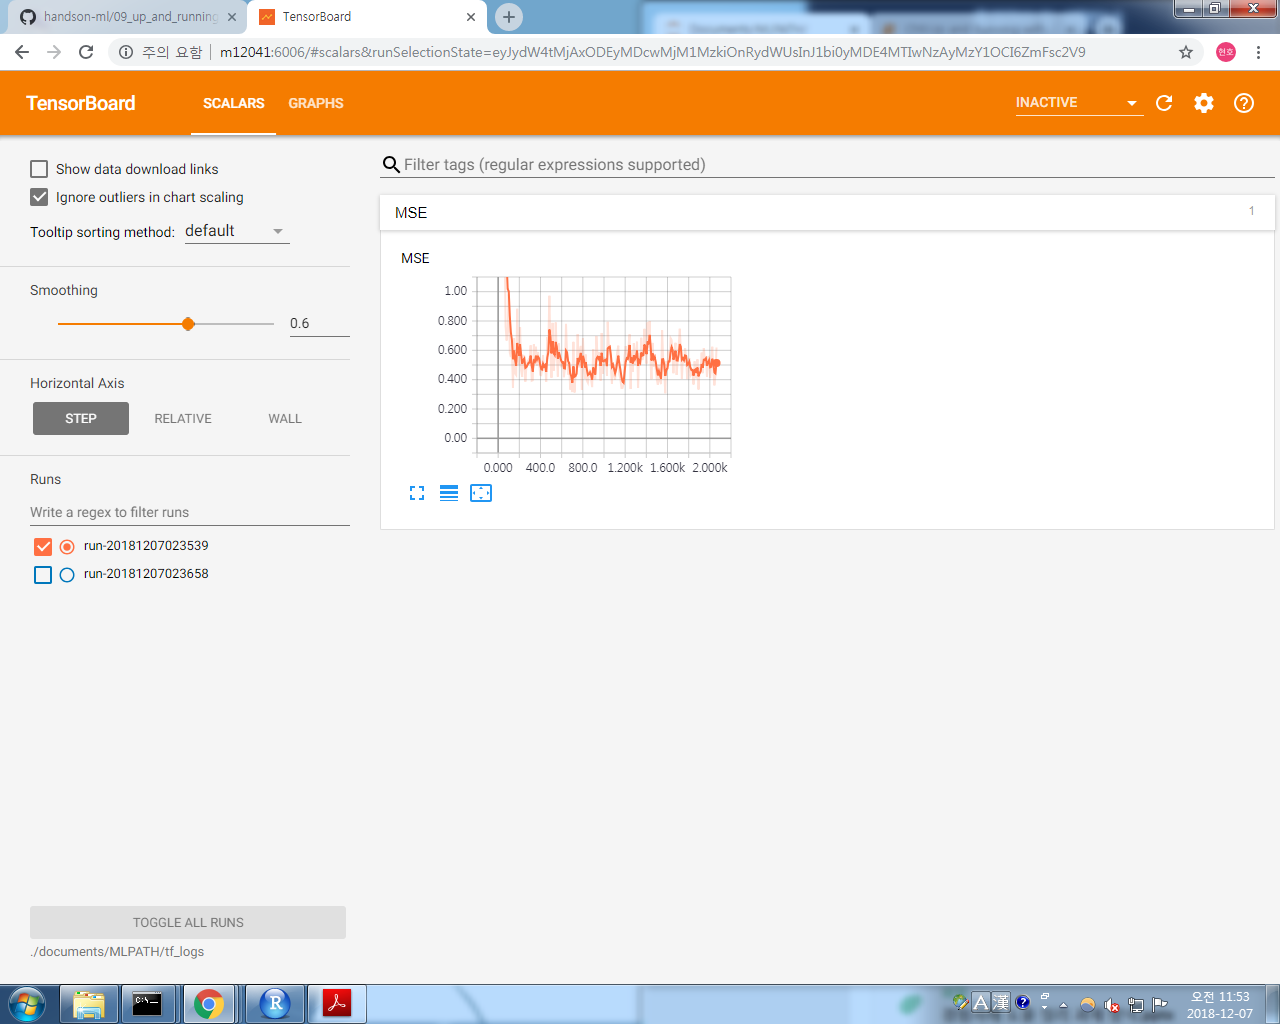

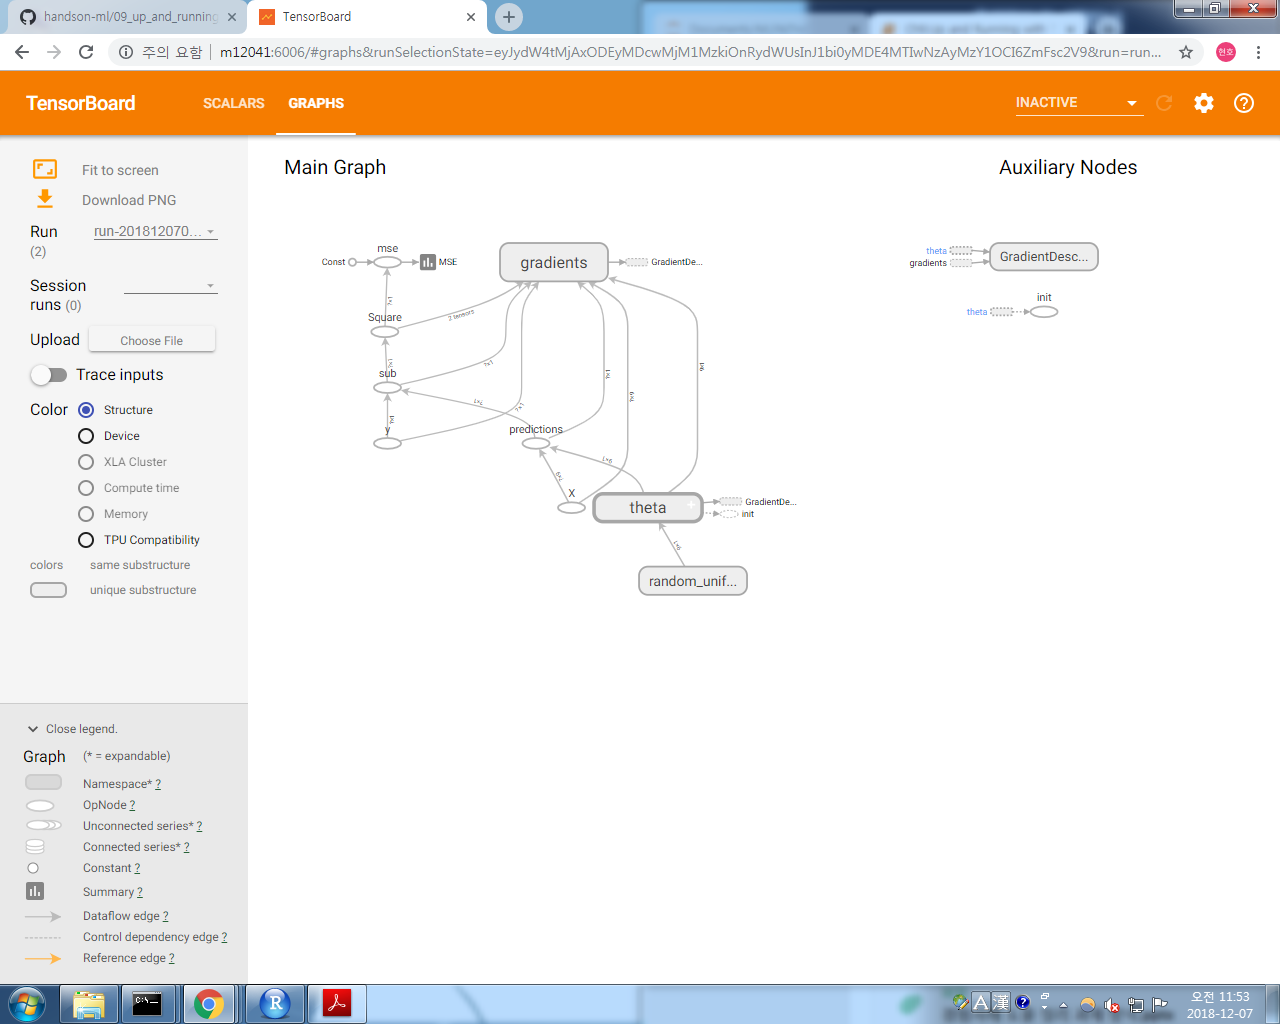

오류가 됸나 남  
해결방법  
1. 텐서 플로우 버전을 낮춘다  
2. https://www.microsoft.com/en-us/download/details.aspx?id=53587 에서 무언가를 다운 받는다  
3. 쳐야할 것을 제대로 친다

## 9.10 이름 범위

복잡한 모델을 다룰 때는 계산 그래프가 수천 개의 노드로 인해 어질러지기 쉽다    
이를 피하려면 이름 범위(name scope)를 만들어 관련 있는 노드들을 그룹으로 묶어야 한다   

이전 코드를 수정해 "loss" 이름 범위 안에 있는 error와 mse를 정의해보도록 한다.

In [46]:
reset_graph()

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

n_epochs = 1000
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")

In [47]:
with tf.name_scope("loss") as scope:
    error = y_pred - y
    mse = tf.reduce_mean(tf.square(error), name="mse")

In [48]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

mse_summary = tf.summary.scalar('MSE', mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [49]:
n_epochs = 10
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            if batch_index % 10 == 0:
                summary_str = mse_summary.eval(feed_dict={X: X_batch, y: y_batch})
                step = epoch * n_batches + batch_index
                file_writer.add_summary(summary_str, step)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

    best_theta = theta.eval()

file_writer.flush()
file_writer.close()
print("best_theta:")
print(best_theta)

best_theta:
[[ 2.0703337 ]
 [ 0.8637145 ]
 [ 0.12255151]
 [-0.31211874]
 [ 0.38510373]
 [ 0.00434168]
 [-0.01232954]
 [-0.83376896]
 [-0.8030471 ]]


In [50]:
print(error.op.name)
print(mse.op.name)

loss/sub
loss/mse


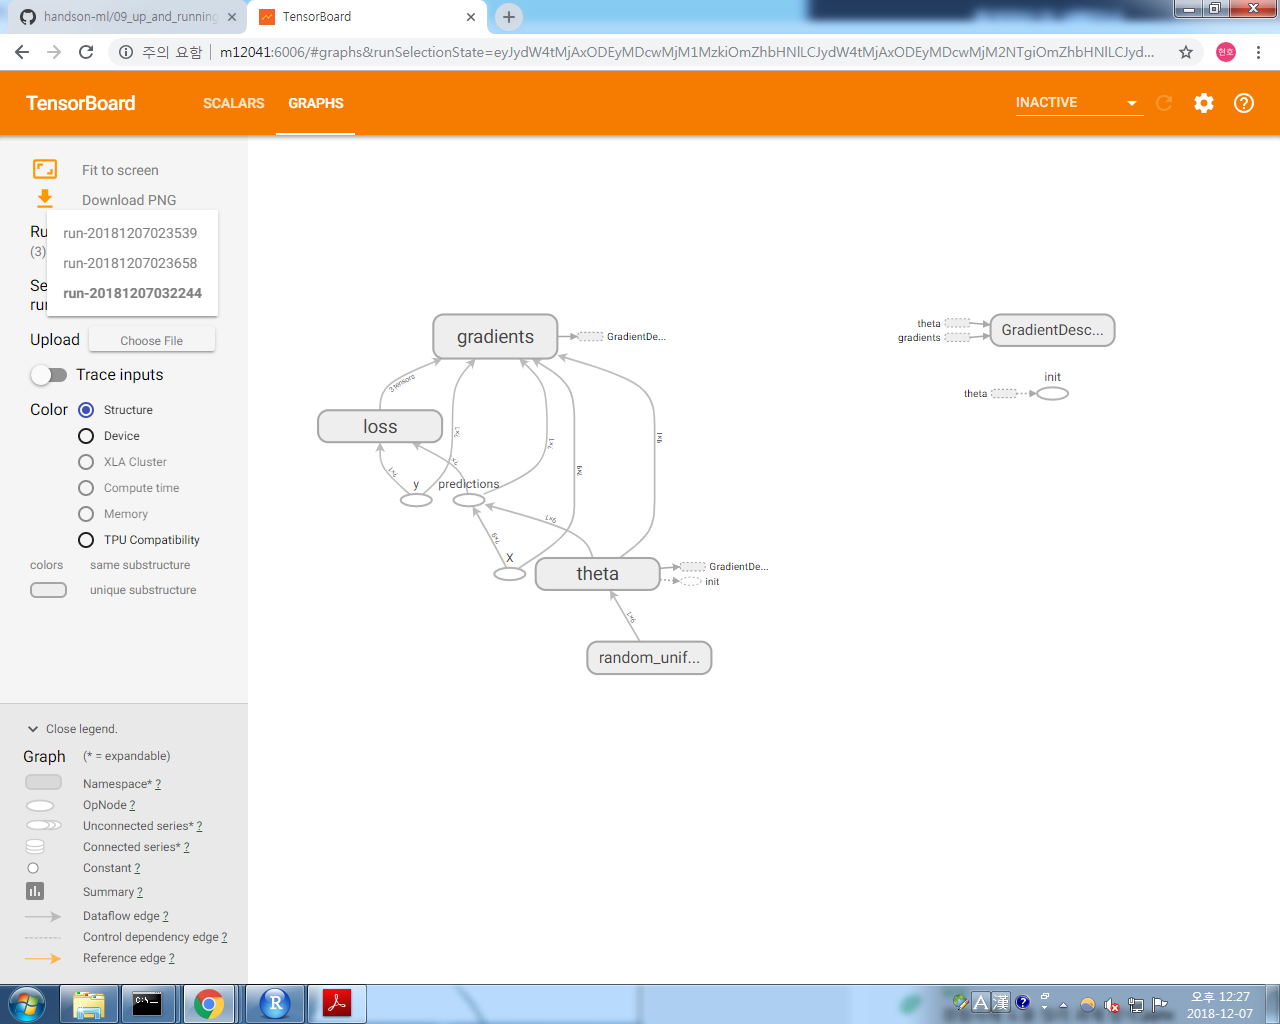

In [51]:
reset_graph()

a1 = tf.Variable(0, name="a")      # name == "a"
a2 = tf.Variable(0, name="a")      # name == "a_1"

with tf.name_scope("param"):       # name == "param"
    a3 = tf.Variable(0, name="a")  # name == "param/a"

with tf.name_scope("param"):       # name == "param_1"
    a4 = tf.Variable(0, name="a")  # name == "param_1/a"

for node in (a1, a2, a3, a4):
    print(node.op.name)
##이름이 곂치면 언더바(_)다음에 숫자로 넘버링
##스코프도 나눠서 부른다는 개념이 없음
##스코프를 나눠서 부르면 다른 스코프로 인식

a
a_1
param/a
param_1/a


## 9.11 모듈화

두 개의 ReLU 출력을 더하는 그래프를 만든다고 가정하자  
(ReLU는 입력에 대한 선형 함수로서 양수는 그대로 출력하고 음수는 0으로 출력한다)  

$$h_{w,h}(X) = max(X\cdot w + b, 0)$$

In [52]:
reset_graph()

n_features = 3
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")

w1 = tf.Variable(tf.random_normal((n_features, 1)), name='weights1')
w2 = tf.Variable(tf.random_normal((n_features, 1)), name='weights2')
b1 = tf.Variable(0.0, name="bias1")
b2 = tf.Variable(0.0, name='bias2')

z1 = tf.add(tf.add(X, w1), b1, name="z1")
z2 = tf.add(tf.add(X, w1), b1, name="z2")

relu1 = tf.maximum(z1, 0., name="relu1")
relu2 = tf.maximum(z2, 0., name="relu2")
##복붙하다 틀릴 수도 있음

output = tf.add(relu1, relu2, name="output")

이런 반복적인 코드는 유지 보수하기 어렵고 에러가 발생하기 쉽다  

다행히 텐서플로우에서 DRY(don't repeat yourself)원칙을 유지하게 도와준다  

다음 코드는 다섯 개의 ReLU를 생성해서 합을 계산한다  

add_n()은 텐서의 리스트를 받아 합을 계산하는 연산 노드를 만든다

In [53]:
def relu(X):
    w_shape = (int(X.get_shape()[1]), 1)
    w = tf.Variable(tf.random_normal(w_shape), name="weights")
    b = tf.Variable(0.0, name='bias') ##기본값 0
    z = tf.add(tf.matmul(X, w), b, name='z')
    return tf.maximum(z, 0., name='relu')

n_features = 3
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = [relu(X) for i in range(5)]
output = tf.add_n(relus, name='output')

노드가 생성될 때 텐서플로우는 그 이름이 이미 존재하는지 확인한다. 만약 같은 이름이 존재하면 밑줄 다음에 숫자를 붙여 고유한 이름으로 만든다.  

이 상황에서는 "weight", "bias", "z", "relu"라는 이름의 노드들이 생긴다(이 외에도 "MatMul" 같이 디폴트 이름을 가진 노드가 더 생긴다)

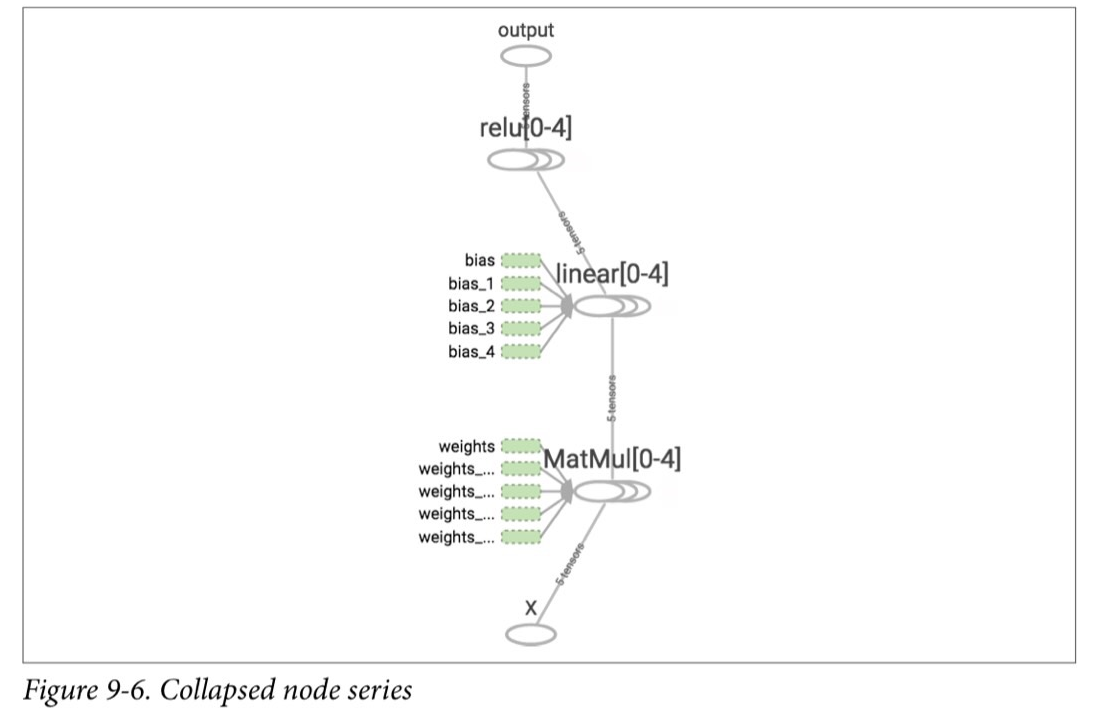

이름 범위를 사용하면 그래프를 훨씬 깔끔하게 표현할 수 있다  

In [54]:
reset_graph()

def relu(X):
    with tf.name_scope("relu"):
        w_shape = int(X.get_shape()[1]), 1                      
        w = tf.Variable(tf.random_normal(w_shape), name="weights")  
        b = tf.Variable(0.0, name="bias")                       
        z = tf.add(tf.matmul(X, w), b, name="z")                    
        return tf.maximum(z, 0., name="max")

In [55]:
n_features = 3
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = [relu(X) for i in range(5)]
output = tf.add_n(relus, name="output")

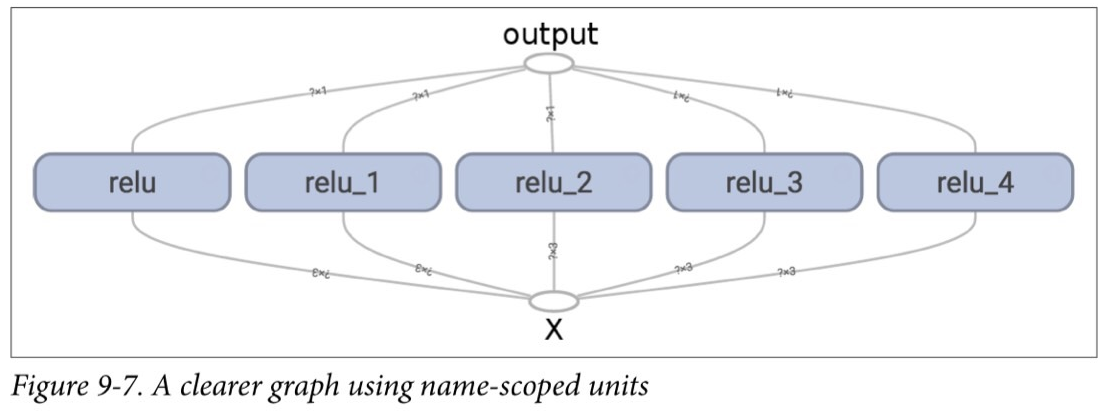

## 9.12 변수 공유

그래프의 여러 구성 요소 간에 변수를 공유하고 싶다면, 간단한 해결 방법은 변수를 먼저 만들고 필요한 함수에 매개변수로 전달하는 것이다  


예를 들어 ReLU의 임곗값을 조정하기 위해 threshold 변수를 모든 ReLU에 공유하려 한다고 하자   
가장 기본적인 방법은 threshold변수를 공유하는 기본적인 방법은 rellu() 함수 밖에서 정의한 후 매개변수를 통해 전달하는 것이다  

In [56]:
reset_graph()

def relu(X, threshold):
    with tf.name_scope("relu"):
        w_shape = int(X.get_shape()[1]), 1
        w = tf.Variable(tf.random_normal(w_shape), name="weights")
        b = tf.Variable(0.0, name="bias")                       
        z = tf.add(tf.matmul(X, w), b, name="z")                    
        return tf.maximum(z, threshold, name="max")
    
threshold = tf.Variable(0.0, name="threshold")
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = [relu(X, threshold) for i in range(5)]
output = tf.add_n(relus, name="output")

threshold 변수로 모든 ReLU의 임곗값을 조절할 수 있다  
하지만 이런 공유 변수가 많으면 항상 매개변수로 전달해야 하므로 번거로워진다(? 무슨말인지 이해하기 어려움)

여러가지 해결방안이 있음
1. 모델에 있는 모든 변수를 담을 파이썬 딕셔너리를 만들고 함수마다 이를 전달하는 방식을 사용
2. 파이썬 클래스를 만듦(예를 들어 ReLU 클래스를 만들면 클래스 변수로 공유 매개변수를 대신할 수 있다)
3. relu()를 맨 처음 호출할 때 함수의 속성으로 다음과 같이 공유 변수를 지정할 수 있다

In [57]:
help(hasattr)

Help on built-in function hasattr in module builtins:

hasattr(obj, name, /)
    Return whether the object has an attribute with the given name.
    
    This is done by calling getattr(obj, name) and catching AttributeError.



In [58]:
reset_graph()

def relu(X):
    with tf.name_scope("relu"):
        if not hasattr(relu, "threshold"):
            relu.threshold = tf.Variable(0.0, name="threshold")
        w_shape = int(X.get_shape()[1]), 1                          
        w = tf.Variable(tf.random_normal(w_shape), name="weights")  
        b = tf.Variable(0.0, name="bias")                          
        z = tf.add(tf.matmul(X, w), b, name="z")                    
        return tf.maximum(z, relu.threshold, name="max")

ReLU 클래스를 만드는 것이 가장 좋은 방법일 수 있지만 간단한 해결책은 아니다

텐서플로우에서는 이것보다 더 깔끔하고 모듈화하기 좋은 다른 방법을 제공한다  
이 방식은 처음엔 이해하기 조금 까다롭지만, 텐서플로우에서 많이 사용된다  


기본 아이디어는 get_variable() 함수를 사용해 공유 변수가 아직 존재하지 않을 때는 새로 만들고, 이미 있을 때는 재사용하는 것이다  
상황에 맞는 동작(생성 또는 재사용)은 현재 variable_scope()의 속성값으로 결정된다  

In [62]:
reset_graph()

with tf.variable_scope("relu"):
    threshold = tf.get_variable("threshold", shape=(),
                                initializer=tf.constant_initializer(0.0))
    
help(tf.get_variable)

Help on function get_variable in module tensorflow.python.ops.variable_scope:

get_variable(name, shape=None, dtype=None, initializer=None, regularizer=None, trainable=None, collections=None, caching_device=None, partitioner=None, validate_shape=True, use_resource=None, custom_getter=None, constraint=None, synchronization=<VariableSynchronization.AUTO: 0>, aggregation=<VariableAggregation.NONE: 0>)
    Gets an existing variable with these parameters or create a new one.
    
    This function prefixes the name with the current variable scope
    and performs reuse checks. See the
    [Variable Scope How To](https://tensorflow.org/guide/variables)
    for an extensive description of how reusing works. Here is a basic example:
    
    ```python
    def foo():
      with tf.variable_scope("foo", reuse=tf.AUTO_REUSE):
        v = tf.get_variable("v", [1])
      return v
    
    v1 = foo()  # Creates v.
    v2 = foo()  # Gets the same, existing v.
    assert v1 == v2
    ```
    
    If i

만약 이 변수가 이전의 get_variable() 호출에서 이미 생성되었다면 이 코드는 예외를 발생할 것이다  
이런 동작 방식은 실수로 변수가 사용되는 것을 막아준다  
변수를 재사용하고 싶다면 명시적으로 변수 범위의 reuse 속성을 True로 지정해야 한다  

In [63]:
with tf.variable_scope("relu", reuse=True):
    threshold = tf.get_variable("threshold")

이 코드는 이미 존재하는 relu/threshold 변수를 가져오며, 존재하지 않거나 get_variable()로 만들지 않은 변수일 경우에는 예외가 발생한다  


또한 변수 범위의 블록 안에서 reuse_variable() 매서드를 호출하여 reuse 속성을 True로 설정할 수도 있다

In [65]:
with tf.variable_scope("relu") as scope:
    scope.reuse_variables()
    threshold - tf.get_variable("threshold")

        reuse가 True로 설정되면 블록 안에서는 다시 False로 되돌릴 수 없다.  또한 이 블록 안에서 다른 변수 범위를 정의하면 자동으로 reuse=True를 상속하게 된다. get_variable()로 만든 변수만 이방식으로 재사용할 수 있다. 

In [68]:
reset_graph()
def relu(X):
    with tf.variable_scope("relu", reuse=True):
        threshold = tf.get_variable("threshold")
        w_shape = int(X.get_shape()[1]), 1
        w = tf.Variable(tf.random_normal(w_shape), name="weights")
        b = tf.Variable(0.0, name="bias")
        z = tf.add(tf.matmul(X, w), b, name="z")
        return tf.maximum(z, threshold, name="max")

X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
with tf.variable_scope("relu"):
    threshold = tf.get_variable("threshold", shape=(),
                                initializer=tf.constant_initializer(0.0))

relus = [relu(X) for relu_index in range(5)]
output = tf.add_n(relus, name="output")

이 코드는 먼저 relu() 함수를 정의하고, 그다음으로 relu/threshold 변수를 생성한다  
그러고 나서 relu() 함수를 호출해 다섯 개의 ReLU를 만든다  
relu() 함수는 relu/threshold 변수를 재사용하여 ReLU 노드를 만든다  

모든 ReLU 코드가 relu() 함수 안에 있지만 threshold 변수는 함수 밖에서 정의되어야 한다  


이를 개선하기 하자!
다음 코드는 처음 호출될 때 relu()함수 안에서 threshold 변수를 생성하고 그다음부터 호출될 때는 이 변수를 재사용한다  
이렇게 하면 relu() 함수는 이름 범위나 변수 공유를 신경 쓰지 않아도 된다  
threshold 변수를 생성하거나 재사용할 때 그냥 get_variable() 함수를 호출하면 된다  
그다음엔 relu()를 다섯 번 호출한다  
처음 호출할 때는 reuse=False가 되고 그다음부터는 reuse=True가 된다

In [71]:
reset_graph()

def relu(X):
    threshold = tf.get_variable("threshold", shape=(),
                               initializer=tf.constant_initializer(0.0))
    w_shape = int(X.get_shape()[1]), 1
    w = tf.Variable(tf.random_normal(w_shape), name="weights")
    b = tf.Variable(0.0, name="bias")
    z = tf.add(tf.matmul(X, w), b, name="z")
    return tf.maximum(z, threshold, name="max")

X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = []
for relu_index in range(5):
    with tf.variable_scope("relu", reuse=(relu_index >= 1)) as scope:
        relus.append(relu(X))
output = tf.add_n(relus, name="output")